In [30]:
from htrc_features import FeatureReader
from htrc_features.feature_reader import group_tokenlist
from htrc_features.utils import id_to_rsync
from python.utils import EFComparison
import pandas as pd
import numpy as np
import time
import uuid
import utils

%load_ext autoreload
%autoreload 2

This notebooks demonstrates page-level Jaccard similarity. This an expensive procedure, but useful as a ground truth.

The algorithms for extracting runs operate on the Jaccard similarity matrix for pages the same way they do on GloVe or SRP
matrices for chunked books.

In [3]:
filenames = pd.read_csv("test_dataset.csv.gz", low_memory = False)

Some test code to explore vol and page methods. Can be cut.

In [5]:
from python.utils import Comparison, HTID

In [109]:
ids = ["mdp.49015002670504", "inu.30000042783195"]

In [110]:
left, right = map(HTID, ids)

In [184]:
left

In [185]:
right

In [166]:
comp = EFComparison(left, right)

Using HTID class


In [167]:
comp.jaccard_matrix
comp.similarity_matrix

array([[0.05882353, 0.05      , 0.        , ..., 0.03108808, 0.0210084 ,
        0.        ],
       [0.05      , 0.02702703, 0.        , ..., 0.01036269, 0.00843882,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07555556, 0.05535055,
        0.        ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

I find 0.2 to be a reasonable threshold for Jaccard similarity. As you see here, there are many page-comparison pairs that reach 0.2 similarity (maybe largely short pages?) but the main run of similarity is successfully extracted.

In [179]:
comp.assemble_sw_runs(threshold=.2)

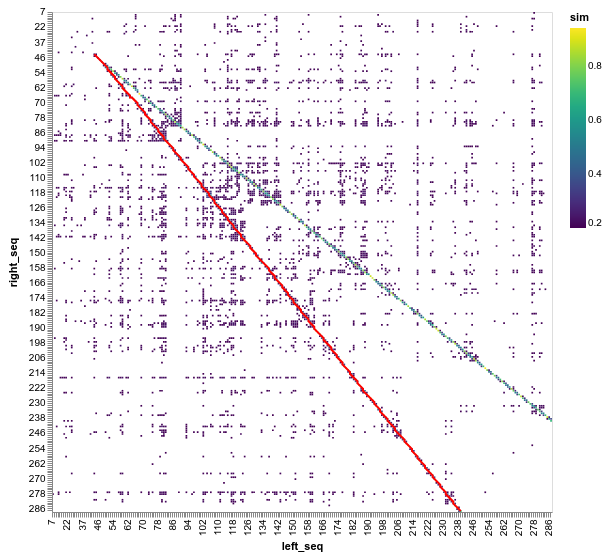

In [183]:
comp.plot("jaccard_matrix", filter = lambda x: x >= .2, runs = True).properties(width=500, height=500)